<a href="https://colab.research.google.com/github/IlYaSsBJ/Coding-Week/blob/main/Catboot_model_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**training model catboost with both cleaned datasets**

In [ ]:
# Charger les données
import pandas as pd

file_path = "/content/age+weight_done.csv"
df = pd.read_csv(file_path)

# Séparer les features et la cible
X = df.drop(columns=['NObeyesdad'])  # Features
y = df['NObeyesdad']  # Cible

# Vérifier la structure
print(X.head())
print(y.head())


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3                Walking  
4  Public_Transportation  
0          Nor

In [ ]:
import pandas as pd

# Charger le fichier CSV
file_path = "/content/age+weight_done.csv"  # Remplace par le chemin de ton fichier si nécessaire
df = pd.read_csv(file_path)

# Afficher les premières lignes pour comprendre la structure des données
print(df.head())


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [ ]:
# Séparer les features et la cible
X = df.drop(columns=['NObeyesdad'])  # Features
y = df['NObeyesdad']  # Cible

# Vérification
print("Features :")
print(X.head())
print("\nCible :")
print(y.head())

Features :
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3                Walking  
4  Public_Transportation  

Ci

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialiser un encodeur
label_encoders = {}

for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le  # Stocker l’encodeur pour une utilisation future

# Encoder la cible également
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

print("Features après encodage :")
print(X.head())
print("\nCible après encodage :")
print(y[:5])


Features après encodage :
   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  
0  3.0     2      0   2.0    0  0.0  1.0     3       3  
1  3.0     2      1   3.0    1  3.0  0.0     2       3  
2  3.0     2      0   2.0    0  2.0  1.0     1       3  
3  3.0     2      0   2.0    0  2.0  0.0     1       4  
4  1.0     2      0   2.0    0  0.0  0.0     2       3  

Cible après encodage :
[1 1 1 5 6]


In [ ]:
from sklearn.model_selection import train_test_split

# Séparer les données (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Taille de l'entraînement : {X_train.shape}")
print(f"Taille du test : {X_test.shape}")


Taille de l'entraînement : (991, 16)
Taille du test : (248, 16)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialiser le scaler
scaler = StandardScaler()

# Normaliser les features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Données normalisées !")


Données normalisées !


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialiser le modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)

print("Modèle entraîné avec succès !")


Modèle entraîné avec succès !


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Faire des prédictions
y_pred = model.predict(X_test)

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

# Afficher la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)

# Afficher le rapport de classification
print("Rapport de classification :\n", classification_report(y_test, y_pred))


Précision du modèle : 0.94
Matrice de confusion :
 [[53  4  0  0  0  0  0]
 [ 0 52  0  0  0  0  0]
 [ 0  2 35  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0 11  0  0]
 [ 0  4  0  0  0 45  1]
 [ 0  3  0  0  0  0 33]]
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        57
           1       0.80      1.00      0.89        52
           2       1.00      0.95      0.97        37
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11
           5       1.00      0.90      0.95        50
           6       0.97      0.92      0.94        36

    accuracy                           0.94       248
   macro avg       0.97      0.96      0.96       248
weighted avg       0.95      0.94      0.95       248



 ***age+weight_done.csv***

In [ ]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Charger le fichier CSV
df = pd.read_csv("/content/age+weight_done.csv")

# Vérifier les premières lignes
print(df.head())


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [ ]:
X = df.drop(columns=['NObeyesdad'])  # Enlever la colonne cible
y = df['NObeyesdad']  # La colonne à prédire

In [ ]:
cat_features = X.select_dtypes(include=['object']).columns.tolist()  # Identifier les colonnes catégoriques
print("Variables catégoriques :", cat_features)

Variables catégoriques : ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Créer le modèle
model = CatBoostClassifier(iterations=500,  # Nombre d'itérations
                           depth=6,         # Profondeur de l'arbre
                           learning_rate=0.05, # Taux d'apprentissage
                           loss_function='MultiClass', # Classification multi-classes
                           cat_features=cat_features, # Spécifier les variables catégoriques
                           verbose=100)  # Afficher la progression

# Entraîner le modèle
model.fit(X_train, y_train)


0:	learn: 1.8282065	total: 220ms	remaining: 1m 49s
100:	learn: 0.4050917	total: 10.9s	remaining: 43s
200:	learn: 0.2108679	total: 17.3s	remaining: 25.7s
300:	learn: 0.1332762	total: 22.6s	remaining: 15s
400:	learn: 0.0995201	total: 29s	remaining: 7.16s
499:	learn: 0.0765869	total: 34.5s	remaining: 0us


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
# Précision globale
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

# Matrice de confusion
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))


Précision du modèle : 0.98
Matrice de confusion :
[[53  0  0  0  0  0  0]
 [ 0 52  0  0  0  1  0]
 [ 0  0 38  0  0  0  0]
 [ 0  0  1  5  0  0  0]
 [ 0  0  0  0 12  0  0]
 [ 0  2  0  0  0 45  1]
 [ 0  1  0  0  0  0 37]]
Rapport de classification :
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        53
      Normal_Weight       0.95      0.98      0.96        53
     Obesity_Type_I       0.97      1.00      0.99        38
    Obesity_Type_II       1.00      0.83      0.91         6
   Obesity_Type_III       1.00      1.00      1.00        12
 Overweight_Level_I       0.98      0.94      0.96        48
Overweight_Level_II       0.97      0.97      0.97        38

           accuracy                           0.98       248
          macro avg       0.98      0.96      0.97       248
       weighted avg       0.98      0.98      0.98       248



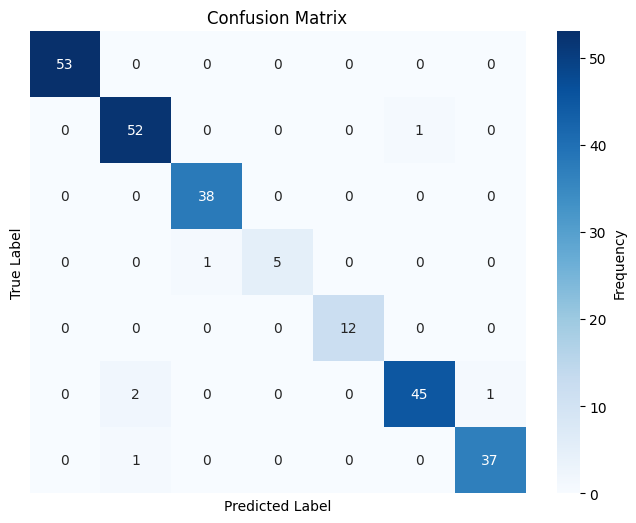

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      0.98      0.96        53
           2       0.97      1.00      0.99        38
           3       1.00      0.83      0.91         6
           4       1.00      1.00      1.00        12
           5       0.98      0.94      0.96        48
           6       0.97      0.97      0.97        38

    accuracy                           0.98       248
   macro avg       0.98      0.96      0.97       248
weighted avg       0.98      0.98      0.98       248



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Matrice de confusion donnée
conf_matrix = np.array([[53, 0, 0, 0, 0, 0, 0],
                        [0, 52, 0, 0, 0, 1, 0],
                        [0, 0, 38, 0, 0, 0, 0],
                        [0, 0, 1, 5, 0, 0, 0],
                        [0, 0, 0, 0, 12, 0, 0],
                        [0, 2, 0, 0, 0, 45, 1],
                        [0, 1, 0, 0, 0, 0, 37]])

# Création de la heatmap avec colorbar
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)

# Ajout des titres
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Ajustement de l'échelle de la colorbar
cbar = ax.collections[0].colorbar
cbar.set_ticks(np.arange(0, 51, 10))  # De 0 à 50 avec un pas de 10
cbar.set_label("Frequency")

# Suppression des ticks et labels des axes
plt.xticks([])
plt.yticks([])

# Affichage de la matrice
plt.show()

# Affichage du rapport de classification
report = classification_report(
    y_true=np.concatenate([[i] * sum(conf_matrix[i]) for i in range(len(conf_matrix))]),
    y_pred=np.concatenate([[j] * conf_matrix[i, j] for i in range(len(conf_matrix)) for j in range(len(conf_matrix))]),
    digits=2
)

print("Classification Report:\n")
print(report)


***dhd-transformed-winsoring.csv***

In [ ]:
# Charger le fichier CSV
df = pd.read_csv("/content/dhd_transformed_winsoring.csv")

# Vérifier les premières lignes
print(df.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [ ]:
X = df.drop(columns=['NObeyesdad'])  # Enlever la colonne cible
y = df['NObeyesdad']  # La colonne à prédire

In [ ]:
cat_features = X.select_dtypes(include=['object']).columns.tolist()  # Identifier les colonnes catégoriques
print("Variables catégoriques :", cat_features)

Variables catégoriques : ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Créer le modèle
model = CatBoostClassifier(iterations=500,  # Nombre d'itérations
                           depth=6,         # Profondeur de l'arbre
                           learning_rate=0.05, # Taux d'apprentissage
                           loss_function='MultiClass', # Classification multi-classes
                           cat_features=cat_features, # Spécifier les variables catégoriques
                           verbose=100)  # Afficher la progression

# Entraîner le modèle
model.fit(X_train, y_train)

0:	learn: 1.8420793	total: 116ms	remaining: 58s
100:	learn: 0.3479877	total: 9.72s	remaining: 38.4s
200:	learn: 0.1907222	total: 15.8s	remaining: 23.5s
300:	learn: 0.1217329	total: 23.1s	remaining: 15.3s
400:	learn: 0.0923824	total: 29.1s	remaining: 7.2s
499:	learn: 0.0722482	total: 38.2s	remaining: 0us


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Précision globale
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

# Matrice de confusion
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

Précision du modèle : 0.96
Matrice de confusion :
[[50  4  0  0  0  0  0]
 [ 1 54  0  0  0  3  0]
 [ 0  0 70  0  0  0  0]
 [ 0  0  1 59  0  0  0]
 [ 0  0  1  0 64  0  0]
 [ 0  7  0  0  0 51  0]
 [ 0  0  0  0  0  1 57]]
Rapport de classification :
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.93      0.95        54
      Normal_Weight       0.83      0.93      0.88        58
     Obesity_Type_I       0.97      1.00      0.99        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.93      0.88      0.90        58
Overweight_Level_II       1.00      0.98      0.99        58

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



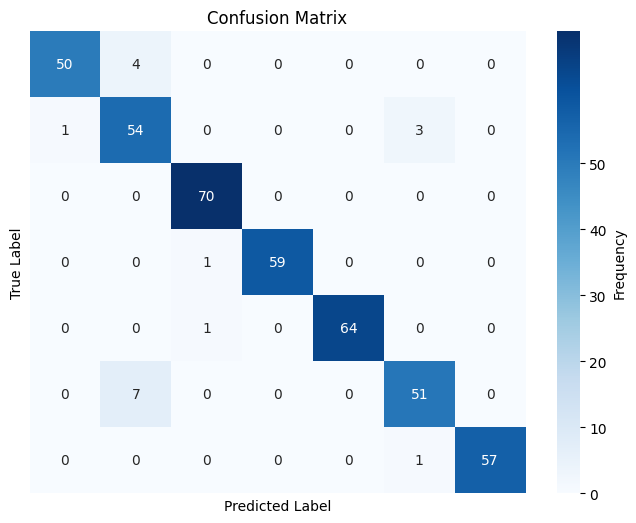

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.83      0.93      0.88        58
           2       0.97      1.00      0.99        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.93      0.88      0.90        58
           6       1.00      0.98      0.99        58

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Nouvelle matrice de confusion
conf_matrix = np.array([[50, 4, 0, 0, 0, 0, 0],
                        [1, 54, 0, 0, 0, 3, 0],
                        [0, 0, 70, 0, 0, 0, 0],
                        [0, 0, 1, 59, 0, 0, 0],
                        [0, 0, 1, 0, 64, 0, 0],
                        [0, 7, 0, 0, 0, 51, 0],
                        [0, 0, 0, 0, 0, 1, 57]])

# Création de la heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)

# Ajout des titres
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Ajustement de l'échelle de la colorbar
cbar = ax.collections[0].colorbar
cbar.set_ticks(np.arange(0, 51, 10))  # Échelle de 0 à 50 avec un pas de 10
cbar.set_label("Frequency")

# Suppression des labels des axes
plt.xticks([])
plt.yticks([])

# Affichage de la matrice
plt.show()

# Génération du rapport de classification
report = classification_report(
    y_true=np.concatenate([[i] * sum(conf_matrix[i]) for i in range(len(conf_matrix))]),
    y_pred=np.concatenate([[j] * conf_matrix[i, j] for i in range(len(conf_matrix)) for j in range(len(conf_matrix))]),
    digits=2
)

print("Classification Report:\n")
print(report)


**Currency and ROC_AUC score**

In [ ]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Charger les datasets
def load_data(file_path):
    df = pd.read_csv(file_path)

    # Encoder la colonne cible
    label_encoder = LabelEncoder()
    df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

    # Identifier les colonnes catégoriques et les encoder
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    if categorical_cols:
        df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    X = df.drop(columns=['NObeyesdad'])  # Utilisation de 'NObeyesdad' comme cible
    y = df['NObeyesdad']
    return X, y

# Appliquer l'undersampling
def apply_undersampling(X, y):
    rus = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X, y)
    return X_resampled, y_resampled

# Charger et prétraiter les datasets
X1, y1 = load_data("/content/age+weight_done.csv")
X2, y2 = load_data("/content/dhd_transformed_winsoring.csv")

# Appliquer l'undersampling
X1_resampled, y1_resampled = apply_undersampling(X1, y1)
X2_resampled, y2_resampled = apply_undersampling(X2, y2)

# Séparer les jeux de données (train/test)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_resampled, y1_resampled, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_resampled, y2_resampled, test_size=0.2, random_state=42)

# Entraîner un modèle CatBoostClassifier
clf = CatBoostClassifier(iterations=200, depth=6, learning_rate=0.1, loss_function='MultiClass', verbose=0)

def train_and_evaluate(X_train, X_test, y_train, y_test, dataset_name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Calcul du ROC AUC Score
    if len(set(y_test)) > 2:  # Cas multi-classes
        roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovo")
    else:  # Cas binaire
        roc_auc = roc_auc_score(y_test, y_proba[:, 1])

    # Affichage des résultats
    print(f"\nRésultats pour {dataset_name} (Undersampling, CatBoost) :")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("Matrice de confusion:")
    print(conf_matrix)
    print("Rapport de classification:")
    print(class_report)

# Évaluer sur les datasets sous-échantillonnés
train_and_evaluate(X1_train, X1_test, y1_train, y1_test, "age+weight_done.csv")
train_and_evaluate(X2_train, X2_test, y2_train, y2_test, "dhd_transformed_winsoring.csv")



Résultats pour age+weight_done.csv (Undersampling, CatBoost) :
Accuracy: 0.98
ROC AUC Score: 0.9977
Matrice de confusion:
[[ 7  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0  6  0  0  0  0]
 [ 0  0  0 10  0  0  0]
 [ 0  0  0  0  9  0  0]
 [ 0  0  0  0  0  7  0]
 [ 0  0  1  0  0  0  5]]
Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         2
           2       0.86      1.00      0.92         6
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         7
           6       1.00      0.83      0.91         6

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47


Résultats pour dhd_transformed_winsoring.csv (Undersampling, CatBoost) :
Accuracy: 

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Charger les datasets
def load_data(file_path):
    df = pd.read_csv(file_path)

    # Encoder la colonne cible
    label_encoder = LabelEncoder()
    df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

    # Identifier les colonnes catégoriques et les encoder
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    if categorical_cols:
        df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    X = df.drop(columns=['NObeyesdad'])  # Utilisation de 'NObeyesdad' comme cible
    y = df['NObeyesdad']
    return X, y

# Appliquer l'oversampling
def apply_oversampling(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

# Charger et prétraiter les datasets
X1, y1 = load_data("/content/age+weight_done.csv")
X2, y2 = load_data("/content/dhd_transformed_winsoring.csv")

# Appliquer l'oversampling
X1_resampled, y1_resampled = apply_oversampling(X1, y1)
X2_resampled, y2_resampled = apply_oversampling(X2, y2)

# Séparer les jeux de données (train/test)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_resampled, y1_resampled, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_resampled, y2_resampled, test_size=0.2, random_state=42)

# Entraîner un modèle CatBoostClassifier
clf = CatBoostClassifier(iterations=200, depth=6, learning_rate=0.1, loss_function='MultiClass', verbose=0)

def train_and_evaluate(X_train, X_test, y_train, y_test, dataset_name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)  # Probabilités pour ROC AUC

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Calcul du ROC AUC Score
    if len(set(y_test)) > 2:  # Cas multi-classes
        roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovo")
    else:  # Cas binaire
        roc_auc = roc_auc_score(y_test, y_proba[:, 1])

    # Affichage des résultats
    print(f"\nRésultats pour {dataset_name} (Oversampling, CatBoost) :")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("Matrice de confusion:")
    print(conf_matrix)
    print("Rapport de classification:")
    print(class_report)

# Évaluer sur les datasets sur-échantillonnés
train_and_evaluate(X1_train, X1_test, y1_train, y1_test, "age+weight_done.csv")
train_and_evaluate(X2_train, X2_test, y2_train, y2_test, "dhd_transformed_winsoring.csv")



Résultats pour age+weight_done.csv (Oversampling, CatBoost) :
Accuracy: 0.97
ROC AUC Score: 0.9990
Matrice de confusion:
[[67  2  0  0  0  0  0]
 [ 0 49  0  0  0  2  0]
 [ 0  0 59  0  0  0  0]
 [ 0  0  0 51  0  0  0]
 [ 0  0  0  0 46  0  0]
 [ 0  5  0  0  0 41  1]
 [ 0  0  1  0  0  1 49]]
Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        69
           1       0.88      0.96      0.92        51
           2       0.98      1.00      0.99        59
           3       1.00      1.00      1.00        51
           4       1.00      1.00      1.00        46
           5       0.93      0.87      0.90        47
           6       0.98      0.96      0.97        51

    accuracy                           0.97       374
   macro avg       0.97      0.97      0.97       374
weighted avg       0.97      0.97      0.97       374


Résultats pour dhd_transformed_winsoring.csv (Oversampling, CatBoost) :
Accuracy: 0.

In [ ]:
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Charger les datasets
def load_data(file_path):
    df = pd.read_csv(file_path)

    # Encoder la colonne cible
    label_encoder = LabelEncoder()
    df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

    # Identifier les colonnes catégoriques et les encoder
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    if categorical_cols:
        df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    X = df.drop(columns=['NObeyesdad'])  # Utilisation de 'NObeyesdad' comme cible
    y = df['NObeyesdad']
    return X, y

# Calculer les poids de classe
def compute_weights(y):
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
    return class_weights.tolist()  # CatBoost attend une liste et non un dictionnaire

# Charger et prétraiter les datasets
X1, y1 = load_data("/content/age+weight_done.csv")
X2, y2 = load_data("/content/dhd_transformed_winsoring.csv")

# Calculer les poids de classe
y1_weights = compute_weights(y1)
y2_weights = compute_weights(y2)

# Séparer les jeux de données (train/test)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Fonction pour entraîner et évaluer le modèle
def train_and_evaluate(X_train, X_test, y_train, y_test, dataset_name, class_weights):
    # Créer un nouveau modèle CatBoost pour chaque dataset avec les poids de classe
    clf = CatBoostClassifier(iterations=200, depth=6, learning_rate=0.1, loss_function='MultiClass', verbose=0, class_weights=class_weights)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)  # Probabilités pour ROC AUC

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Calcul du ROC AUC Score
    try:
        if len(np.unique(y_test)) > 2:
            # Pour le cas multi-classes
            roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovo')
        else:
            # Pour le cas binaire
            roc_auc = roc_auc_score(y_test, y_proba[:, 1])
    except ValueError:
        roc_auc = "Non calculable"  # Cas où il y a trop peu de classes pour calculer le ROC AUC

    print(f"\nRésultats pour {dataset_name} (Class Weights, CatBoost) :")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"ROC AUC Score: {roc_auc}")
    print("Matrice de confusion:")
    print(conf_matrix)
    print("Rapport de classification:")
    print(class_report)

# Évaluer sur les datasets avec class weights
train_and_evaluate(X1_train, X1_test, y1_train, y1_test, "age+weight_done.csv", y1_weights)
train_and_evaluate(X2_train, X2_test, y2_train, y2_test, "dhd_transformed_winsoring.csv", y2_weights)



Résultats pour age+weight_done.csv (Class Weights, CatBoost) :
Accuracy: 0.95
ROC AUC Score: 0.9989096543043912
Matrice de confusion:
[[54  3  0  0  0  0  0]
 [ 1 50  0  0  0  1  0]
 [ 0  0 36  0  0  0  1]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0 11  0  0]
 [ 0  3  0  0  0 46  1]
 [ 0  0  1  0  0  2 33]]
Rapport de classification:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        57
           1       0.89      0.96      0.93        52
           2       0.97      0.97      0.97        37
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11
           5       0.94      0.92      0.93        50
           6       0.94      0.92      0.93        36

    accuracy                           0.95       248
   macro avg       0.96      0.96      0.96       248
weighted avg       0.95      0.95      0.95       248


Résultats pour dhd_transformed_winsoring.csv (Class Weights, CatBoost) 

**SHAP**

In [ ]:
pip install shap

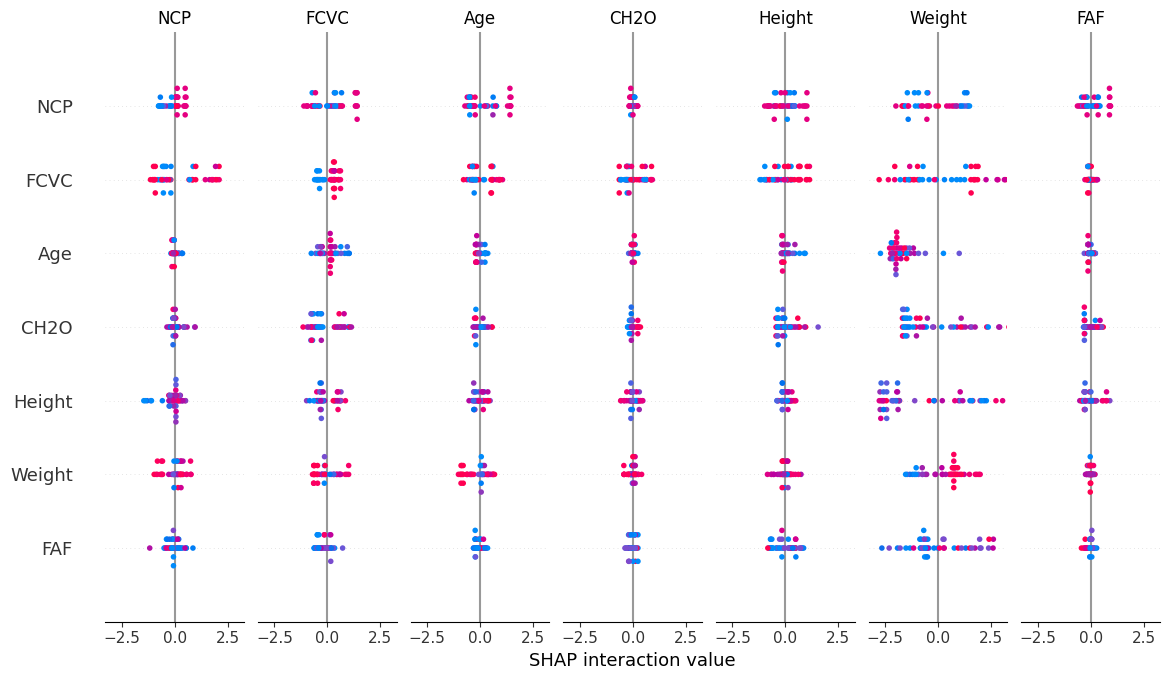

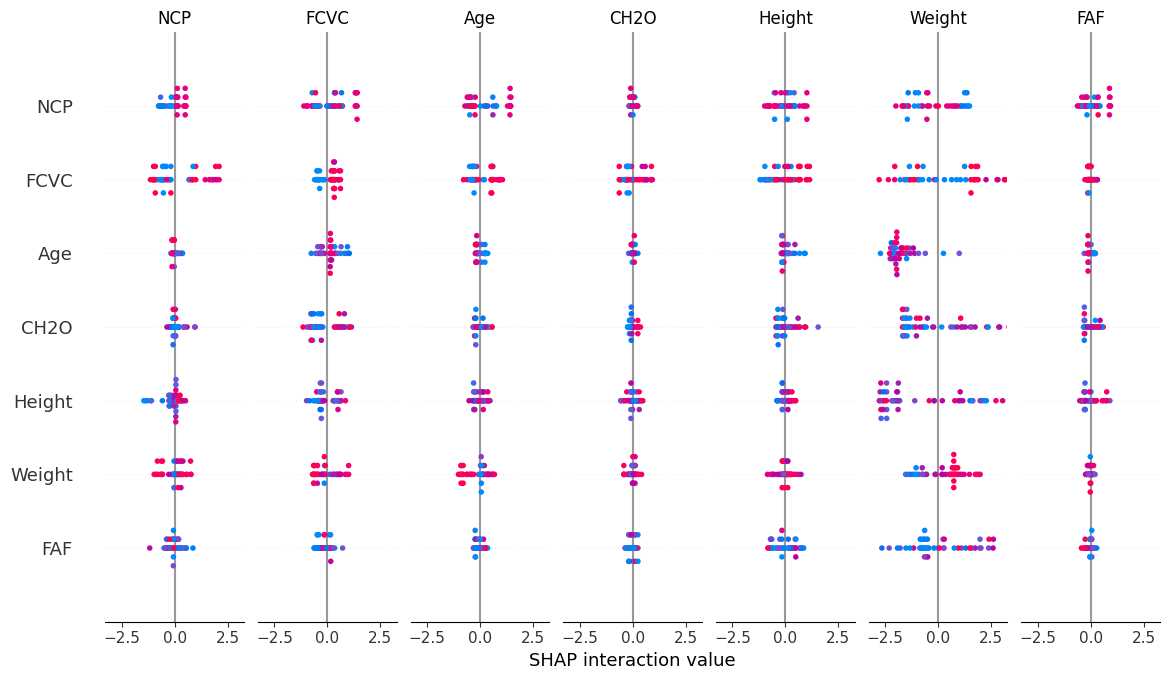

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from catboost import CatBoostClassifier
import shap
from sklearn.preprocessing import LabelEncoder

# Charger les datasets
def load_data(file_path):
    df = pd.read_csv(file_path)

    # Encoder la colonne cible
    label_encoder = LabelEncoder()
    df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

    # Identifier les colonnes catégoriques et les encoder
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    if categorical_cols:
        df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    X = df.drop(columns=['NObeyesdad'])  # Utilisation de 'NObeyesdad' comme cible
    y = df['NObeyesdad']
    return X, y

# Appliquer l'undersampling
def apply_undersampling(X, y):
    rus = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X, y)
    return X_resampled, y_resampled

# Charger et prétraiter le dataset
X1, y1 = load_data("/content/age+weight_done.csv")

# Appliquer l'undersampling
X1_resampled, y1_resampled = apply_undersampling(X1, y1)

# Séparer les jeux de données (train/test)
X_train, X_test, y_train, y_test = train_test_split(X1_resampled, y1_resampled, test_size=0.2, random_state=42)

# Créer et entraîner un modèle CatBoost
clf = CatBoostClassifier(iterations=200, depth=6, learning_rate=0.1, loss_function='MultiClass', verbose=0)
clf.fit(X_train, y_train)

# Utilisation de SHAP pour expliquer les prédictions du modèle
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# Visualisation des résultats avec SHAP
# Visualiser la contribution de chaque feature pour chaque observation
shap.summary_plot(shap_values, X_test)

# Visualiser l'importance des features (moyenne des valeurs absolues des SHAP values)
shap.summary_plot(shap_values, X_test, plot_type="bar")


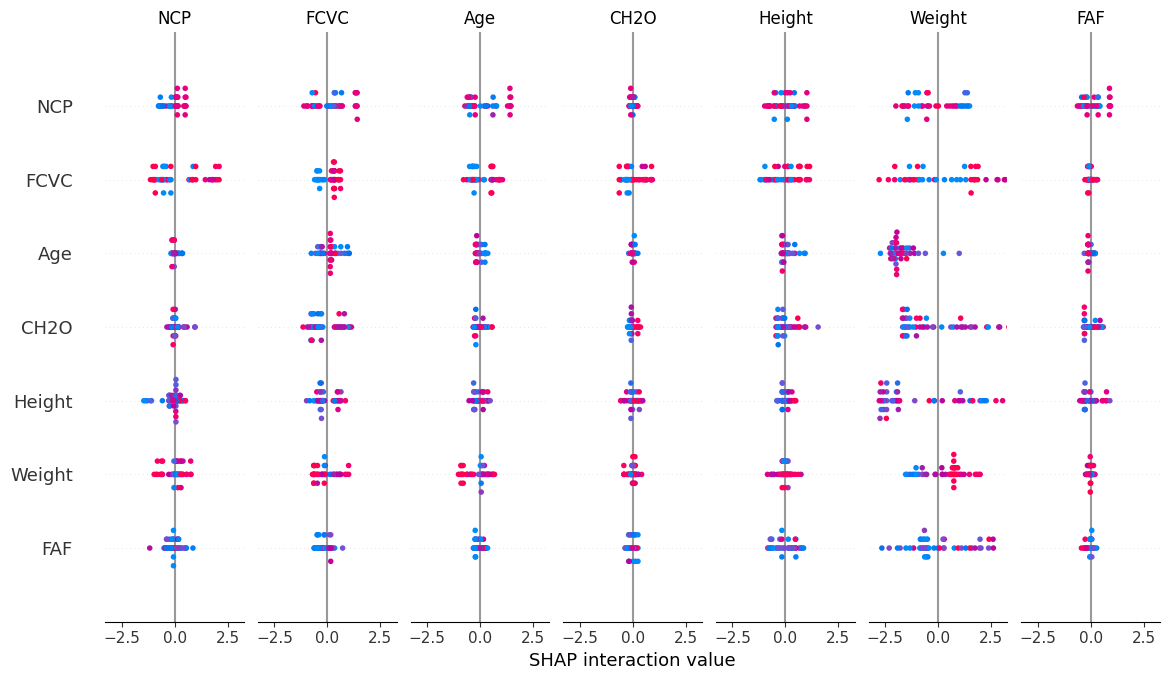

La caractéristique la plus influente est : SMOKE_yes


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from catboost import CatBoostClassifier
import shap
from sklearn.preprocessing import LabelEncoder

# Charger les datasets
def load_data(file_path):
    df = pd.read_csv(file_path)

    # Encoder la colonne cible
    label_encoder = LabelEncoder()
    df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

    # Identifier les colonnes catégoriques et les encoder
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    if categorical_cols:
        df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    X = df.drop(columns=['NObeyesdad'])  # Utilisation de 'NObeyesdad' comme cible
    y = df['NObeyesdad']
    return X, y

# Appliquer l'undersampling
def apply_undersampling(X, y):
    rus = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X, y)
    return X_resampled, y_resampled

# Charger et prétraiter le dataset
X1, y1 = load_data("/content/age+weight_done.csv")

# Appliquer l'undersampling
X1_resampled, y1_resampled = apply_undersampling(X1, y1)

# Séparer les jeux de données (train/test)
X_train, X_test, y_train, y_test = train_test_split(X1_resampled, y1_resampled, test_size=0.2, random_state=42)

# Créer et entraîner un modèle CatBoost
clf = CatBoostClassifier(iterations=200, depth=6, learning_rate=0.1, loss_function='MultiClass', verbose=0)
clf.fit(X_train, y_train)

# Utilisation de SHAP pour expliquer les prédictions du modèle
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# Visualisation de l'importance des features
shap.summary_plot(shap_values, X_test)

# Identifier et afficher la feature la plus influente
# Nous sélectionnons la caractéristique qui a l'impact le plus important sur les prédictions
# Il s'agit de la caractéristique avec la plus grande importance moyenne sur les valeurs SHAP
import numpy as np

# Calculer l'importance des caractéristiques
feature_importance = np.mean(np.abs(shap_values), axis=0)

# Trouver l'indice de la feature la plus influente
most_important_feature_index = np.argmax(feature_importance)

# Afficher le nom de la feature la plus influente
most_important_feature = X_test.columns[most_important_feature_index]
print(f"La caractéristique la plus influente est : {most_important_feature}")


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder

# Charger les datasets
def load_data(file_path):
    df = pd.read_csv(file_path)

    # Encoder la colonne cible
    label_encoder = LabelEncoder()
    df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

    # Identifier les colonnes catégoriques et les encoder
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    if categorical_cols:
        df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    X = df.drop(columns=['NObeyesdad'])  # Utilisation de 'NObeyesdad' comme cible
    y = df['NObeyesdad']
    return X, y

# Appliquer l'undersampling
def apply_undersampling(X, y):
    rus = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X, y)
    return X_resampled, y_resampled

# Charger et prétraiter le dataset
X1, y1 = load_data("/content/age+weight_done.csv")

# Appliquer l'undersampling
X1_resampled, y1_resampled = apply_undersampling(X1, y1)

# Séparer les jeux de données (train/test)
X_train, X_test, y_train, y_test = train_test_split(X1_resampled, y1_resampled, test_size=0.2, random_state=42)

# Créer et entraîner un modèle CatBoost
clf = CatBoostClassifier(iterations=200, depth=6, learning_rate=0.1, loss_function='MultiClass', verbose=0)
clf.fit(X_train, y_train)

# Prédictions et évaluation du modèle
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovo')

# Calcul du rapport de classification
report = classification_report(y_test, y_pred, output_dict=True)

# Conversion du rapport en DataFrame pour l'affichage
report_df = pd.DataFrame(report).transpose()

# Ajout d'une ligne pour l'accuracy
report_df.loc['accuracy'] = [accuracy] * len(report_df.columns)

# Ajout d'une ligne pour le ROC AUC
roc_auc_row = pd.DataFrame({'precision': [None], 'recall': [None], 'f1-score': [None], 'support': [roc_auc]}, index=['ROC-AUC Score'])
report_df = pd.concat([report_df, roc_auc_row])

# Affichage du tableau directement
print(report_df)


               precision    recall  f1-score    support
0               1.000000  1.000000  1.000000   7.000000
1               1.000000  1.000000  1.000000   2.000000
2               0.857143  1.000000  0.923077   6.000000
3               1.000000  1.000000  1.000000  10.000000
4               1.000000  1.000000  1.000000   9.000000
5               1.000000  1.000000  1.000000   7.000000
6               1.000000  0.833333  0.909091   6.000000
accuracy        0.978723  0.978723  0.978723   0.978723
macro avg       0.979592  0.976190  0.976024  47.000000
weighted avg    0.981763  0.978723  0.978575  47.000000
ROC-AUC Score        NaN       NaN       NaN   0.997714


<ipython-input-77-97eb869a59f4>:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  report_df = pd.concat([report_df, roc_auc_row])


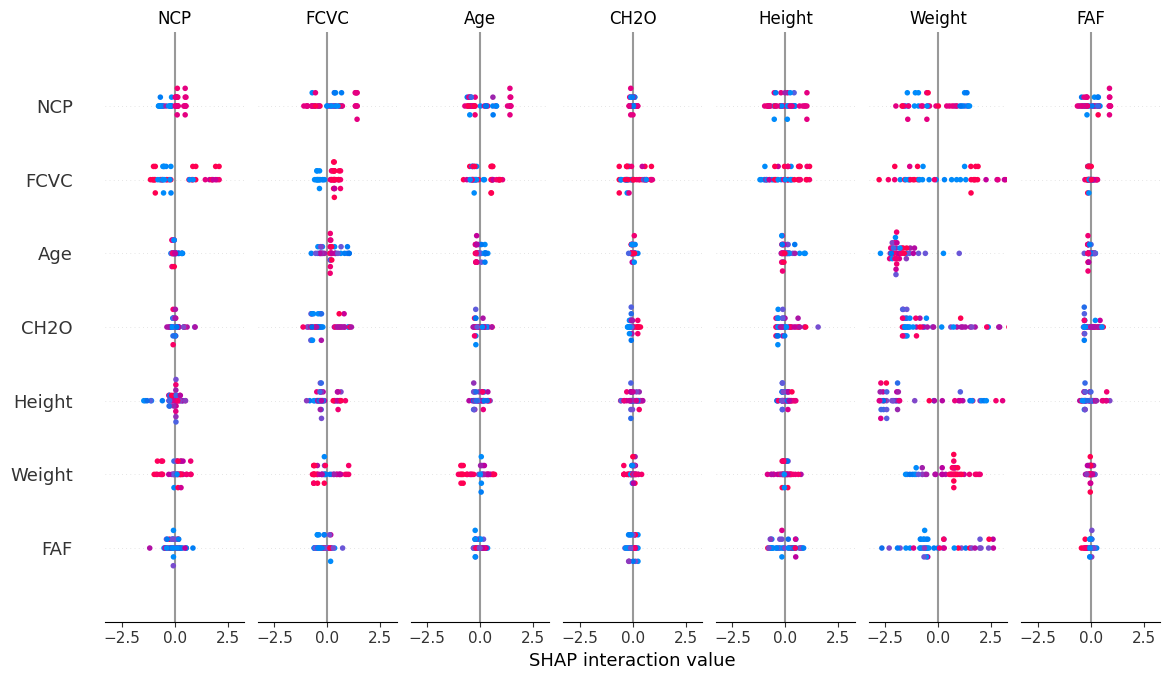

In [ ]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder

# Charger les datasets
def load_data(file_path):
    df = pd.read_csv(file_path)

    # Encoder la colonne cible
    label_encoder = LabelEncoder()
    df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

    # Identifier les colonnes catégoriques et les encoder
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    if categorical_cols:
        df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    X = df.drop(columns=['NObeyesdad'])  # Utilisation de 'NObeyesdad' comme cible
    y = df['NObeyesdad']
    return X, y

# Appliquer l'undersampling
def apply_undersampling(X, y):
    rus = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X, y)
    return X_resampled, y_resampled

# Charger et prétraiter le dataset
X1, y1 = load_data("/content/age+weight_done.csv")

# Appliquer l'undersampling
X1_resampled, y1_resampled = apply_undersampling(X1, y1)

# Séparer les jeux de données (train/test)
X_train, X_test, y_train, y_test = train_test_split(X1_resampled, y1_resampled, test_size=0.2, random_state=42)

# Créer et entraîner un modèle CatBoost
clf = CatBoostClassifier(iterations=200, depth=6, learning_rate=0.1, loss_function='MultiClass', verbose=0)
clf.fit(X_train, y_train)

# Utilisation de SHAP pour expliquer les prédictions du modèle
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# Visualisation de l'importance des features avec SHAP summary plot
shap.summary_plot(shap_values, X_test)


app test

In [ ]:
import catboost

# Save the model
model.save_model("catboost_model.cbm")

# Save as pickle (optional, for easier loading)
import pickle
with open("catboost_model.pkl", "wb") as f:
    pickle.dump(model, f)



CatBoostError: There is no trained model to use save_model(). Use fit() to train model. Then use this method.

In [ ]:
from catboost import CatBoostClassifier  # ou CatBoostRegressor selon votre cas

# Définir votre modèle (ajustez les paramètres selon votre besoin)
model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss')

# Charger les données
import pandas as pd
df = pd.read_csv("/content/age+weight_done.csv")

# Séparer les caractéristiques et la cible
X = df.drop(columns=["target_column"])  # Remplacez "target_column" par le nom de votre variable cible
y = df["target_column"]

# Entraîner le modèle
model.fit(X, y)

# Maintenant, vous pouvez enregistrer le modèle
model.save_model("catboost_model.cbm")



KeyError: "['target_column'] not found in axis"

In [ ]:
# Sauvegarde du modèle CatBoost
clf.save_model("catboost_model.cbm")
import pickle

# Sauvegarde en format Pickle
with open("catboost_model.pkl", "wb") as f:
    pickle.dump(clf, f)

print("Modèle CatBoost sauvegardé avec succès !")


CatBoostError: There is no trained model to use save_model(). Use fit() to train model. Then use this method.

In [ ]:
print(clf.is_fitted())  # Doit retourner True si le modèle est bien entraîné

False


In [ ]:
clf.fit(X_train, y_train)
print("Modèle entraîné avec succès !")

Modèle entraîné avec succès !


In [ ]:
print(X_train.shape, y_train.shape)  # Vérifie les dimensions des données
print(X_train.head())  # Vérifie les premières lignes des features
print(y_train.value_counts())  # Vérifie la répartition des classes

(184, 23) (184,)
            Age    Height      Weight      FCVC       NCP      CH2O       FAF  \
347   19.000000  1.610000   53.800000  2.000000  3.000000  2.000000  2.000000   
40    21.000000  1.530000   65.000000  2.000000  3.000000  1.000000  0.000000   
1006  22.661556  1.660324   94.189167  2.000000  3.000000  2.000000  0.000000   
729   21.652229  1.700181   75.057177  2.086093  3.546352  2.081121  1.993666   
1161  25.447208  1.658910  104.548794  2.859097  1.340361  1.530508  0.174475   

           TUE  Gender_Male  family_history_with_overweight_yes  ...  CAEC_no  \
347   1.000000        False                                True  ...    False   
40    1.000000        False                                True  ...    False   
1006  0.105936         True                                True  ...    False   
729   0.673835         True                                True  ...    False   
1161  1.261705         True                                True  ...    False   

      SMO

In [ ]:
clf.save_model("catboost_model.cbm")

# Sauvegarde en format Pickle (optionnel)
import pickle
with open("catboost_model.pkl", "wb") as f:
    pickle.dump(clf, f)


In [ ]:
from google.colab import files
files.download("catboost_model.cbm")
files.download("catboost_model.pkl")  # Si tu as sauvegardé en Pickle


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>